In [ ]:
import pandas as pd
import warnings
import numpy as np
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/fraud_oracle.csv')
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
df.drop(['Age','PolicyNumber','RepNumber'],axis=1,inplace=True)

In [ ]:
warnings.filterwarnings('ignore')

**DATA CHECK**

In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,FraudFound_P,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,0.059857,407.704280,2.487808,1994.866472
std,1.287585,1.259115,0.237230,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,0.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,0.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,0.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,1.000000,700.000000,4.000000,1996.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Fault                 15420 non-null  object
 11  PolicyType            15420 non-null  object
 12  VehicleCategory       15420 non-null  object
 13  VehiclePrice          15420 non-null  object
 14  FraudFound_P          15420 non-null  int64 
 15  Deductible            15420 non-null

In [ ]:
df.isna().sum()

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates()


In [ ]:
df.duplicated().sum()

0

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,Policy Holder,Sport - Liability,Sport,more than 69000,0,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,Third Party,Sedan - Liability,Sport,20000 to 29000,0,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,Third Party,Sport - Collision,Sport,more than 69000,0,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [ ]:
df.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,400,4,more than 30,more than 30,none,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [ ]:
df.rename(columns={'FraudFound_P':'Fraud'},inplace=True)

In [ ]:
df['Fraud'].value_counts()

,count
Fraud,
0,14497
1,923


In [ ]:
df.groupby('Fraud')['Make'].value_counts()

Fraud  Make     
0      Pontiac      3624
       Toyota       2935
       Honda        2622
       Mazda        2231
       Chevrolet    1587
       Ford          417
       Accura        413
       VW            275
       Dodge         107
       Saab           97
       Mercury        77
       Saturn         52
       Nisson         29
       BMW            14
       Jaguar          6
       Porche          5
       Mecedes         3
       Ferrari         2
       Lexus           1
1      Pontiac       213
       Toyota        186
       Honda         179
       Mazda         123
       Chevrolet      94
       Accura         59
       Ford           33
       Saab           11
       VW              8
       Mercury         6
       Saturn          6
       Dodge           2
       BMW             1
       Mecedes         1
       Nisson          1
Name: count, dtype: int64

In [ ]:
df['Sex'].value_counts()

,count
Sex,
Male,13000
Female,2420


In [ ]:
s=df.groupby('Fraud')['Sex'].value_counts()
s

Fraud  Sex   
0      Male      12182
       Female     2315
1      Male        818
       Female      105
Name: count, dtype: int64

In [ ]:
df.groupby('Fraud')['MaritalStatus'].value_counts()

Fraud  MaritalStatus
0      Married          9986
       Single           4406
       Divorced           73
       Widow              32
1      Married           639
       Single            278
       Divorced            3
       Widow               3
Name: count, dtype: int64

In [ ]:
df.groupby('Fraud')['AccidentArea'].value_counts()

Fraud  AccidentArea
0      Urban           13032
       Rural            1465
1      Urban             790
       Rural             133
Name: count, dtype: int64

In [ ]:
df.groupby('Fraud')['PolicyType'].value_counts()

Fraud  PolicyType          
0      Sedan - Collision       5200
       Sedan - Liability       4951
       Sedan - All Perils      3676
       Sport - Collision        300
       Utility - All Perils     299
       Utility - Collision       27
       Sport - All Perils        22
       Utility - Liability       21
       Sport - Liability          1
1      Sedan - All Perils       411
       Sedan - Collision        384
       Sport - Collision         48
       Utility - All Perils      41
       Sedan - Liability         36
       Utility - Collision        3
Name: count, dtype: int64

In [ ]:
df.groupby('Fraud')['AgeOfVehicle'].value_counts()

Fraud  AgeOfVehicle
0      7 years         5482
       more than 7     3775
       6 years         3220
       5 years         1262
       new              341
       4 years          208
       3 years          139
       2 years           70
1      7 years          325
       6 years          228
       more than 7      206
       5 years           95
       new               32
       4 years           21
       3 years           13
       2 years            3
Name: count, dtype: int64

In [ ]:
a=df.groupby('Fraud')['AgeOfPolicyHolder'].value_counts()
a

Fraud  AgeOfPolicyHolder
0      31 to 35             5233
       36 to 40             3806
       41 to 50             2684
       51 to 65             1322
       26 to 30              580
       over 65               478
       16 to 17              289
       21 to 25               92
       18 to 20               13
1      31 to 35              360
       36 to 40              237
       41 to 50              144
       51 to 65               70
       26 to 30               33
       16 to 17               31
       over 65                30
       21 to 25               16
       18 to 20                2
Name: count, dtype: int64

In [ ]:
df.groupby('Fraud')['WitnessPresent'].value_counts()

Fraud  WitnessPresent
0      No                14413
       Yes                  84
1      No                  920
       Yes                   3
Name: count, dtype: int64

In [ ]:
df.groupby('Fraud')['PoliceReportFiled'].value_counts()

Fraud  PoliceReportFiled
0      No                   14085
       Yes                    412
1      No                     907
       Yes                     16
Name: count, dtype: int64

In [ ]:
df.groupby('Fraud')['VehicleCategory'].value_counts()

Fraud  VehicleCategory
0      Sedan              8876
       Sport              5274
       Utility             347
1      Sedan               795
       Sport                84
       Utility              44
Name: count, dtype: int64

**EXPLORATORY DATA ANALYSIS**

1_***Fraud detection by sex***

([<matplotlib.patches.Wedge at 0x7fb34852aad0>,
 [Text(-0.8691979537020537, 0.6741623819823845, "(0, 'Male')"),
  Text(0.7278463549439881, -0.8247664418456598, "(0, 'Female')"),
  Text(1.0759623449260927, -0.2287029346141939, "(1, 'Male')"),
  Text(1.09974831421611, -0.023529670180955656, "(1, 'Female')")],
 [Text(-0.4741079747465747, 0.3677249356267552, '79.00'),
  Text(0.39700710269672074, -0.44987260464308715, '15.01'),
  Text(0.5868885517778687, -0.12474705524410575, '5.30'),
  Text(0.5998627168451508, -0.012834365553248538, '0.68')])

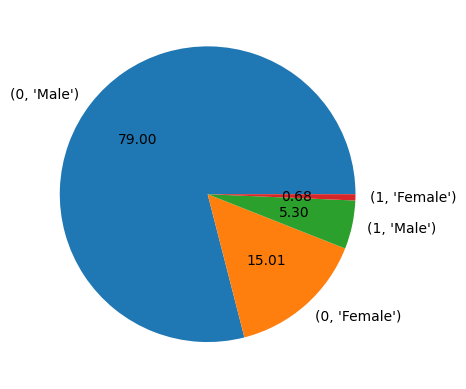

In [ ]:
plt.pie(s,labels=s.index,autopct='%.02f')

***2_Fraud Detection by VehicleCategory***

<Axes: xlabel='VehicleCategory', ylabel='count'>

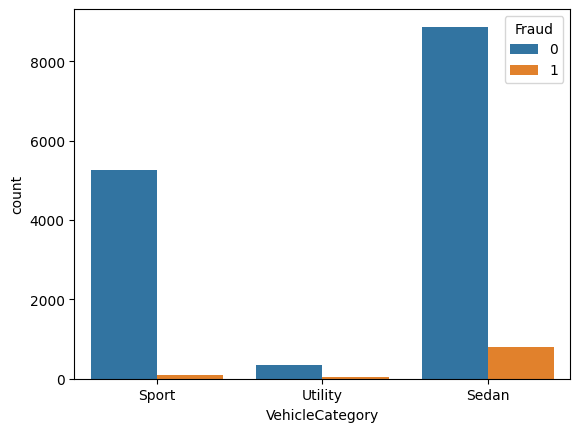

In [ ]:
sns.countplot(df,x='VehicleCategory',hue='Fraud')

***3_Fraud Detection by Make***

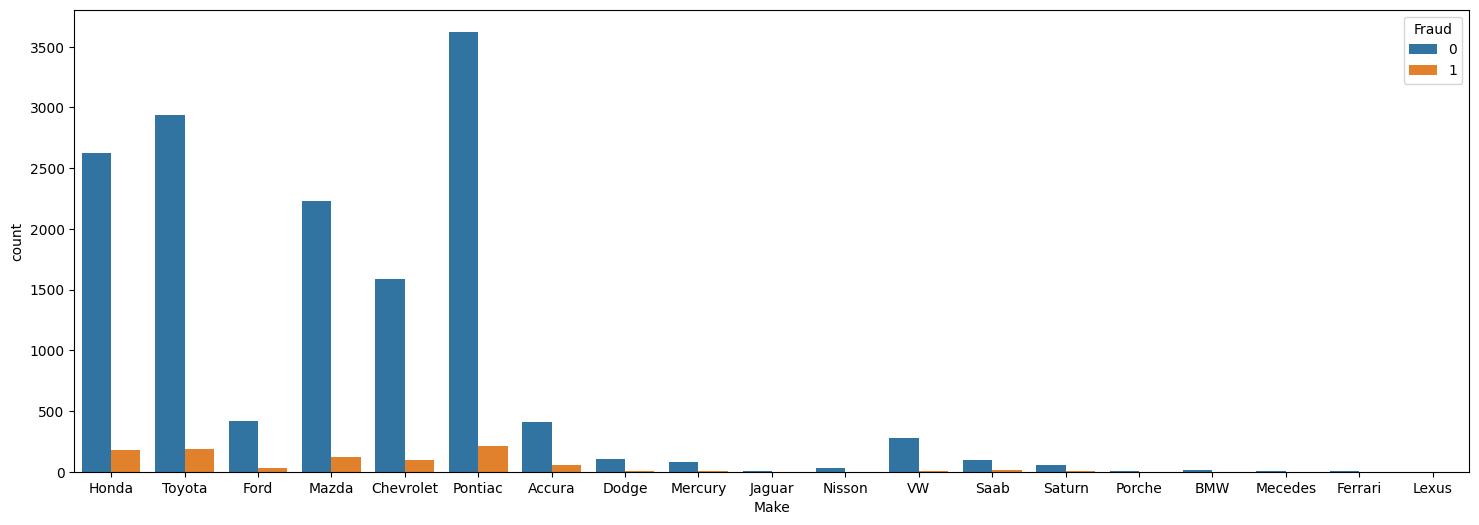

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(df,x='Make',hue='Fraud')
plt.show()

***4_Fraud Detection by age of vehicle and policy holder***

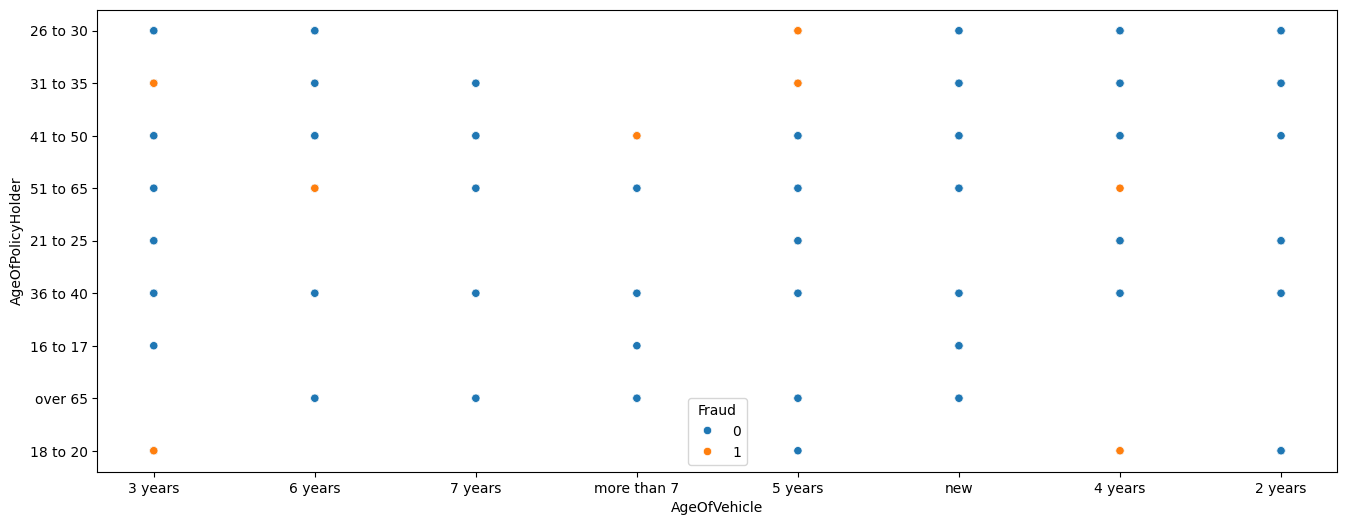

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x="AgeOfVehicle", y="AgeOfPolicyHolder", hue="Fraud", data=df)
plt.show()

***5_Fraud Detection by Accident Area***

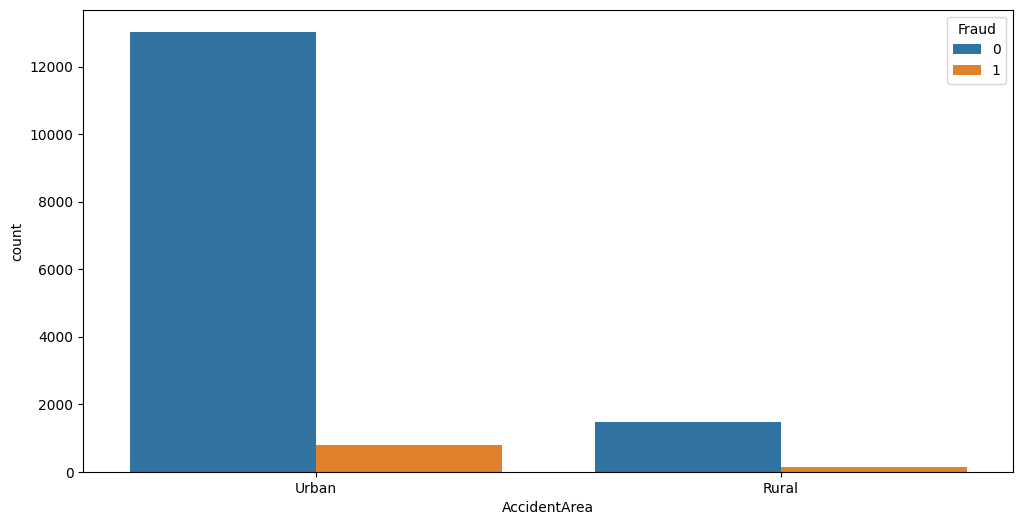

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(df,x='AccidentArea',hue='Fraud')
plt.show()


***6_Fraud Detection by PolicyType***

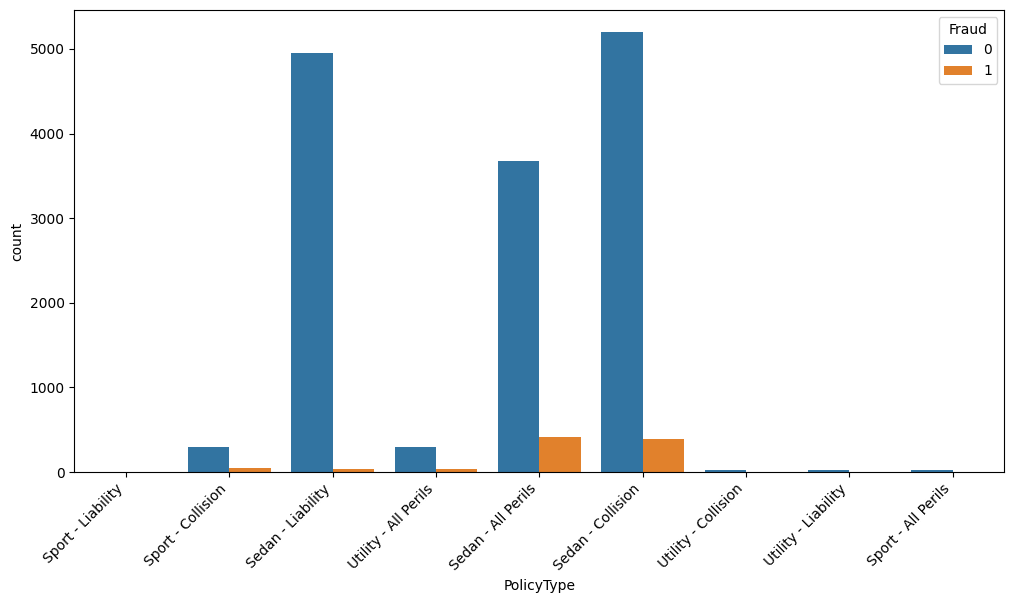

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='PolicyType', hue='Fraud', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# plt.figure(figsize=(12,6))
# sns.barplot(x='Fraud',y='PolicyType',data=df)
# plt.xticks(rotation=45, ha='right')
# plt.show()

***7_Fraud Detection by Vehicle Price***

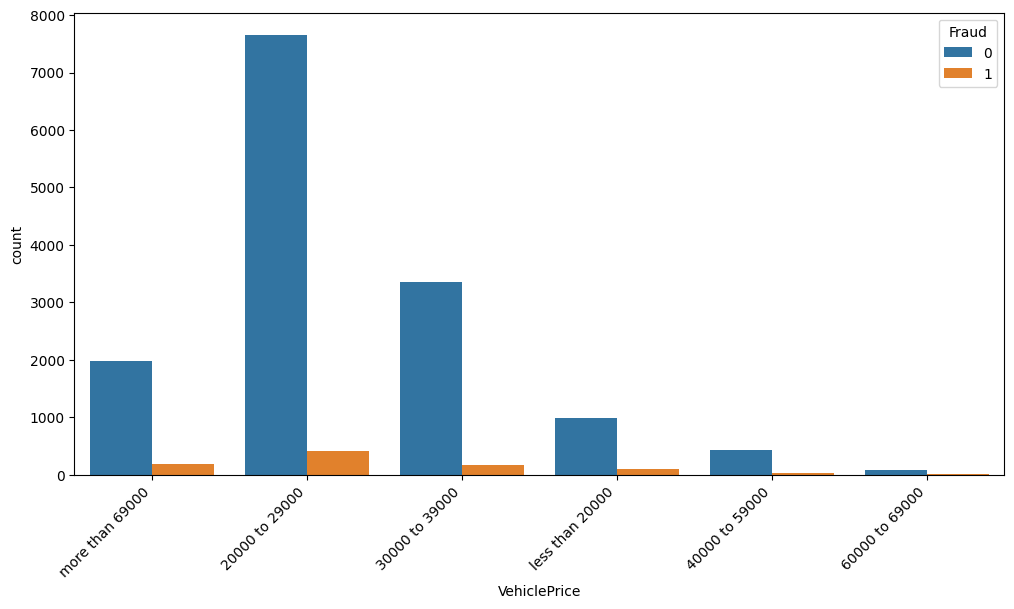

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='VehiclePrice', hue='Fraud', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

***8_Fraud Detected by Age & SeX***

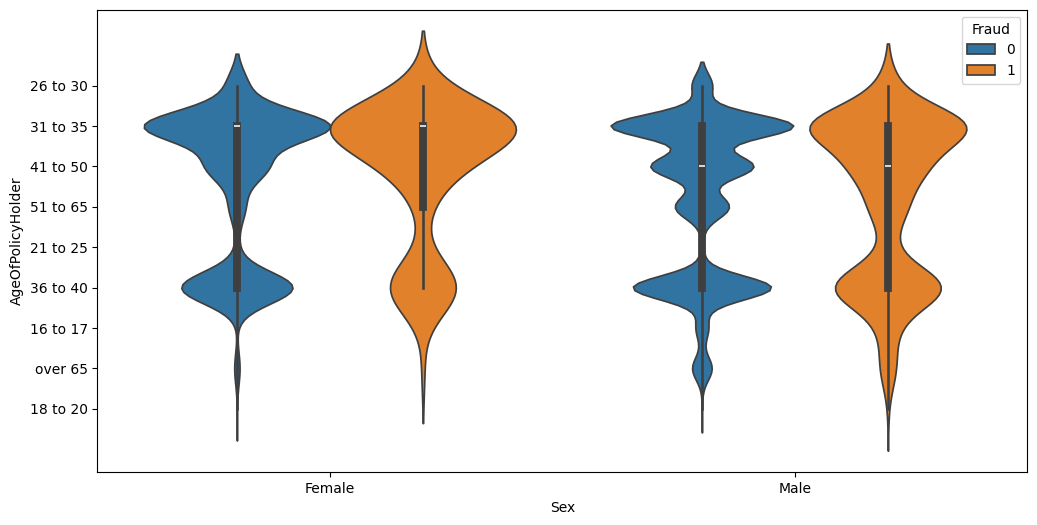

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Sex', y='AgeOfPolicyHolder', data=df, hue='Fraud')
plt.show()

***9_Relationship  between Numeric features***

<Axes: >

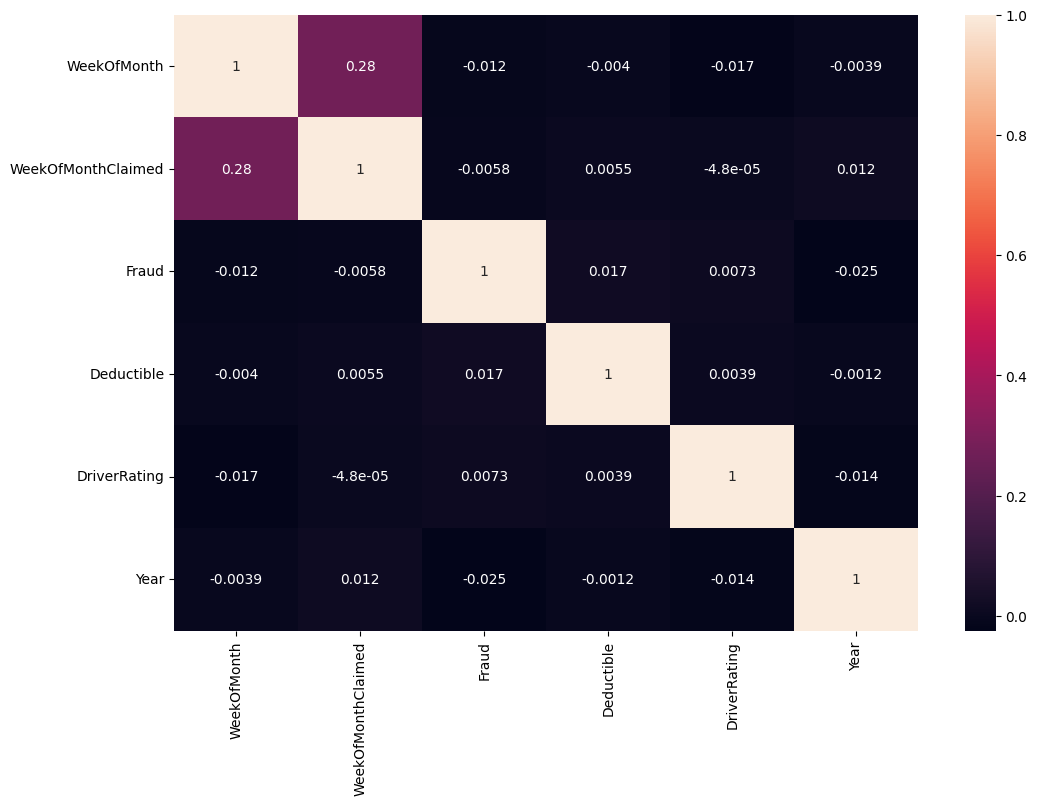

In [ ]:

plt.figure(figsize = (12,8))
sns.heatmap(df.corr(numeric_only=True),annot = True)

***10_BoxPlot to identify Outliers***

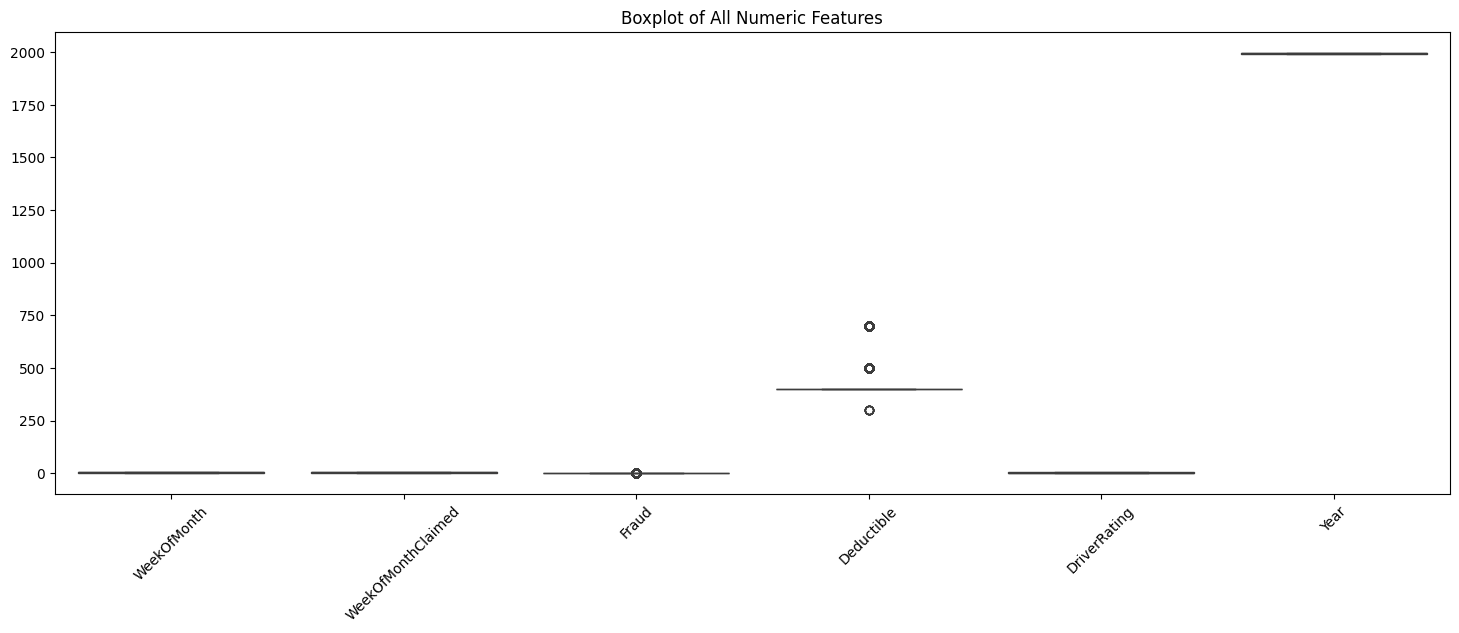

In [ ]:

df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=45)
plt.title("Boxplot of All Numeric Features")
plt.show()


In [ ]:
df['Deductible'].value_counts()

,count
Deductible,
400,14838
700,311
500,263
300,8


**DATA PREPROCESSING**

Handling Outliers

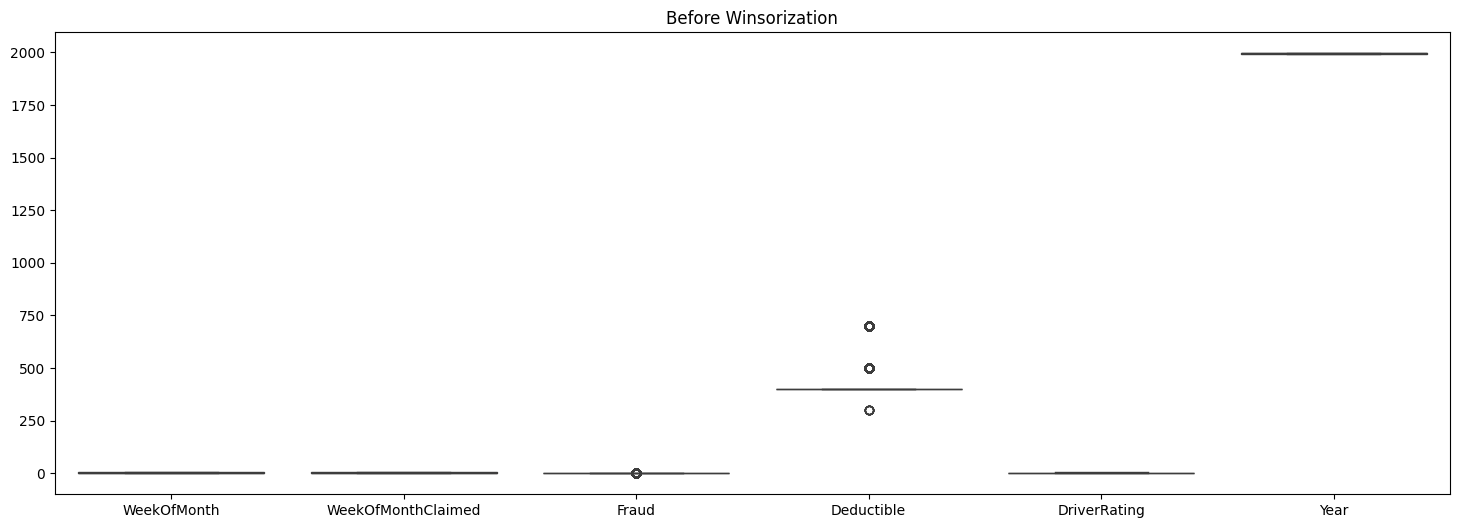

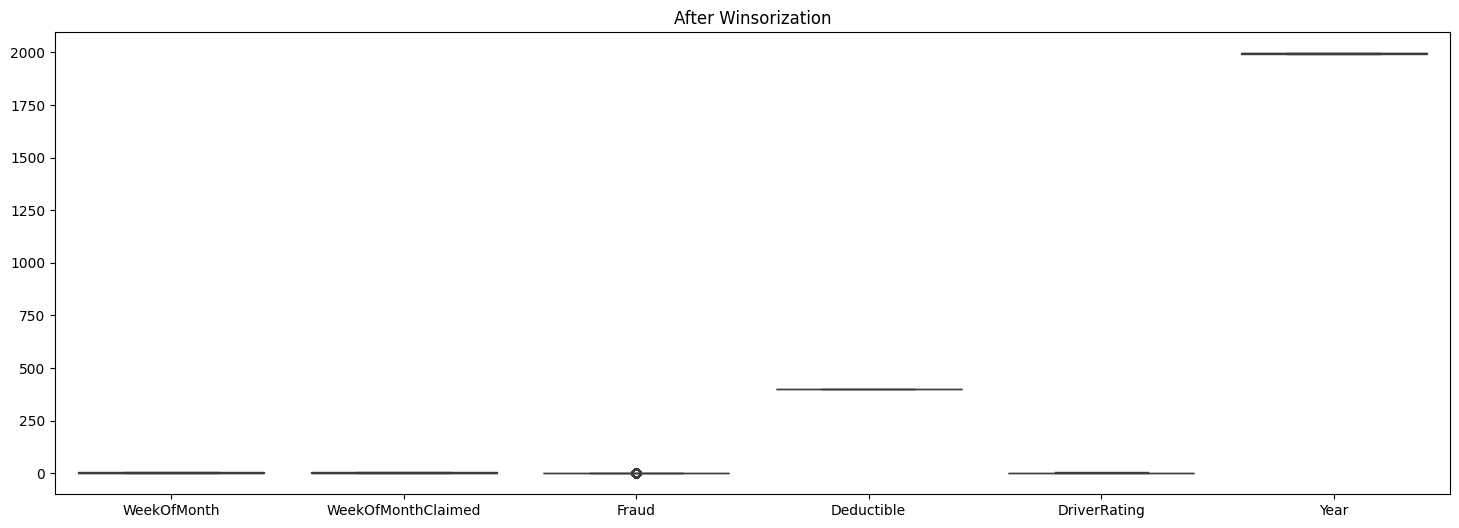

In [ ]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_numeric)
plt.title('Before Winsorization')
plt.show()

df_numeric['Deductible'] = winsorize(df_numeric['Deductible'], limits=[0.04, 0.04])


plt.figure(figsize=(18, 6))
sns.boxplot(data=df_numeric)
plt.title('After Winsorization')
plt.show()

In [ ]:
df_non_numeric = df.select_dtypes(exclude=['number'])



In [ ]:
df_combined = pd.concat([df_numeric, df_non_numeric], axis=1)

In [ ]:
df=df_combined.copy()
df

,WeekOfMonth,WeekOfMonthClaimed,Fraud,Deductible,DriverRating,Year,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,5,1,0,400,1,1994,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,Sport,more than 69000,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,3,4,0,400,4,1994,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,Sport,more than 69000,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,5,2,0,400,3,1994,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,Sport,more than 69000,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,2,1,0,400,2,1994,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,Sport,20000 to 29000,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,5,2,0,400,1,1994,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,Sport,more than 69000,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,5,1,400,4,1996,Nov,Friday,Toyota,Urban,Tuesday,Nov,Male,Married,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,5,1,0,400,3,1996,Nov,Thursday,Pontiac,Urban,Friday,Dec,Male,Married,Policy Holder,Sedan - Liability,Sport,30000 to 39000,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,5,1,1,400,4,1996,Nov,Thursday,Toyota,Rural,Friday,Dec,Male,Single,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,1,2,0,400,4,1996,Dec,Monday,Toyota,Urban,Thursday,Dec,Female,Married,Third Party,Sedan - All Perils,Sedan,20000 to 29000,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [ ]:
df['Deductible'].value_counts()

,count
Deductible,
400,15420


*Convert Objects to numeric*

In [ ]:
df.dtypes

,0
WeekOfMonth,int64
WeekOfMonthClaimed,int64
Fraud,int64
Deductible,int64
DriverRating,int64
Year,int64
Month,object
DayOfWeek,object
Make,object
AccidentArea,object


Label Encoding

In [ ]:
cols = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
encoder=LabelEncoder()
for i in cols:
  encoder.fit(df[i])
  print(encoder.classes_)
  df[i]=encoder.transform(df[i])


['Apr' 'Aug' 'Dec' 'Feb' 'Jan' 'Jul' 'Jun' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
['Accura' 'BMW' 'Chevrolet' 'Dodge' 'Ferrari' 'Ford' 'Honda' 'Jaguar'
 'Lexus' 'Mazda' 'Mecedes' 'Mercury' 'Nisson' 'Pontiac' 'Porche' 'Saab'
 'Saturn' 'Toyota' 'VW']
['Rural' 'Urban']
['0' 'Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday'
 'Wednesday']
['0' 'Apr' 'Aug' 'Dec' 'Feb' 'Jan' 'Jul' 'Jun' 'Mar' 'May' 'Nov' 'Oct'
 'Sep']
['Female' 'Male']
['Divorced' 'Married' 'Single' 'Widow']
['Policy Holder' 'Third Party']
['Sedan - All Perils' 'Sedan - Collision' 'Sedan - Liability'
 'Sport - All Perils' 'Sport - Collision' 'Sport - Liability'
 'Utility - All Perils' 'Utility - Collision' 'Utility - Liability']
['Sedan' 'Sport' 'Utility']
['20000 to 29000' '30000 to 39000' '40000 to 59000' '60000 to 69000'
 'less than 20000' 'more than 69000']
['1 to 7' '15 to 30' '8 to 15' 'more than 30' 'none']
['15 to 30' '8 to 15' 'more than 30' 'n

In [ ]:
df.corr()[['Fraud']].sort_values(by='Fraud',ascending=False)


,Fraud
Fraud,1.000000
VehiclePrice,0.061541
Sex,0.029953
PastNumberOfClaims,0.023363
NumberOfSuppliments,0.013264
NumberOfCars,0.009109
DriverRating,0.007266
Days_Policy_Accident,0.005529
MaritalStatus,0.000568
DayOfWeekClaimed,-0.002065


In [ ]:
df.dtypes

,0
WeekOfMonth,int64
WeekOfMonthClaimed,int64
Fraud,int64
Deductible,int64
DriverRating,int64
Year,int64
Month,int64
DayOfWeek,int64
Make,int64
AccidentArea,int64


Input features

In [ ]:
X=df.drop(['Fraud'],axis=1)
X

,WeekOfMonth,WeekOfMonthClaimed,Deductible,DriverRating,Year,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,5,1,400,1,1994,2,6,6,1,6,5,0,2,0,5,1,5,3,2,3,1,3,0,0,0,3,0,2,2
1,3,4,400,4,1994,4,6,6,1,2,5,1,2,0,4,1,5,3,2,3,4,4,1,0,0,3,3,0,1
2,5,2,400,3,1994,10,0,6,1,5,10,1,1,0,4,1,5,3,2,0,5,6,0,0,0,3,3,0,1
3,2,1,400,2,1994,6,2,17,0,1,6,1,1,1,2,1,0,3,2,0,6,7,1,0,0,2,3,0,2
4,5,2,400,1,1994,4,1,6,1,6,4,0,2,1,4,1,5,3,2,3,3,4,0,0,0,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,5,400,4,1996,9,0,17,1,6,10,1,1,0,1,0,0,3,2,1,4,4,0,0,0,3,3,0,1
15416,5,1,400,3,1996,9,4,13,1,1,3,1,1,0,2,1,1,3,2,2,4,4,0,0,0,2,3,2,2
15417,5,1,400,4,1996,9,4,17,0,1,3,1,2,0,1,0,0,3,2,2,3,3,0,0,0,0,3,0,1
15418,1,2,400,4,1996,2,1,17,1,5,3,0,1,1,0,0,0,3,2,3,0,4,0,0,0,2,3,0,0


Label

In [ ]:
y=df['Fraud']
y

,Fraud
0,0
1,0
2,0
3,0
4,0
...,...
15415,1
15416,0
15417,1
15418,0


Feature Selection

In [ ]:
df.corr()['Fraud']

,Fraud
WeekOfMonth,-0.011861
WeekOfMonthClaimed,-0.005761
Fraud,1.000000
Deductible,NaN
DriverRating,0.007266
Year,-0.024760
Month,-0.008670
DayOfWeek,-0.017456
Make,-0.019187
AccidentArea,-0.033499


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=14)
X_n = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print('Selected Features:', selected_features.tolist())

Selected Features: ['Year', 'Make', 'AccidentArea', 'Sex', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'AgentType', 'AddressChange_Claim', 'BasePolicy']


In [ ]:
X_new=df[['Year','Make','AccidentArea','Sex','Fault','PolicyType','VehicleCategory','VehiclePrice','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','AgentType','AddressChange_Claim','BasePolicy']]
X_new

,Year,Make,AccidentArea,Sex,Fault,PolicyType,VehicleCategory,VehiclePrice,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,AgentType,AddressChange_Claim,BasePolicy
0,1994,6,1,0,0,5,1,5,3,1,3,0,0,2
1,1994,6,1,1,0,4,1,5,3,4,4,0,3,1
2,1994,6,1,1,0,4,1,5,0,5,6,0,3,1
3,1994,17,0,1,1,2,1,0,0,6,7,0,3,2
4,1994,6,1,0,1,4,1,5,3,3,4,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,1996,17,1,1,0,1,0,0,1,4,4,0,3,1
15416,1996,13,1,1,0,2,1,1,2,4,4,0,3,2
15417,1996,17,0,1,0,1,0,0,2,3,3,0,3,1
15418,1996,17,1,0,1,0,0,0,3,0,4,0,3,0


Scaling

In [ ]:
scaler=MinMaxScaler()
scaler.fit(X_new)
X_scaled=scaler.transform(X_new)

Spliting Data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

MODELS

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=9)
models=[knn,sv,nb,dt]
for model in models:
  print(f'**************************{model}*****************************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(f'Training Accuracy: {round(model.score(X_train, y_train) * 100, 2)}%')
  print(f'Test Accuracy: {round(model.score(X_test, y_test) * 100, 2)}%')


**************************KNeighborsClassifier(n_neighbors=7)*****************************
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4317
           1       0.16      0.02      0.03       309

    accuracy                           0.93      4626
   macro avg       0.55      0.51      0.50      4626
weighted avg       0.88      0.93      0.90      4626

Training Accuracy: 94.52%
Test Accuracy: 92.87%
**************************SVC()*****************************
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4317
           1       0.00      0.00      0.00       309

    accuracy                           0.93      4626
   macro avg       0.47      0.50      0.48      4626
weighted avg       0.87      0.93      0.90      4626

Training Accuracy: 94.31%
Test Accuracy: 93.32%
**************************GaussianNB()*****************************
              precision    rec

In [ ]:
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xb=XGBClassifier(random_state=1)
rf=RandomForestClassifier(random_state=1)
models=[ab,gb,xb,rf]
for model in models:
  print(f'**************************{model}*****************************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(f'Training Accuracy: {round(model.score(X_train, y_train) * 100, 2)}%')
  print(f'Test Accuracy: {round(model.score(X_test, y_test) * 100, 2)}%')


**************************AdaBoostClassifier(random_state=1)*****************************
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4317
           1       0.23      0.01      0.02       309

    accuracy                           0.93      4626
   macro avg       0.58      0.50      0.49      4626
weighted avg       0.89      0.93      0.90      4626

Training Accuracy: 94.08%
Test Accuracy: 93.17%
**************************GradientBoostingClassifier(random_state=1)*****************************
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4317
           1       0.80      0.03      0.05       309

    accuracy                           0.93      4626
   macro avg       0.87      0.51      0.51      4626
weighted avg       0.93      0.93      0.90      4626

Training Accuracy: 94.64%
Test Accuracy: 93.45%
**************************XGBClassifier(base_score=None, boost

Dataset is an imbalanced dataset. We have to do oversampling/under sampling.

Oversampling

In [ ]:
os=SMOTE(random_state=1)
X_train_os,y_train_os=os.fit_resample(X_train,y_train)
X_test_os,y_test_os=os.fit_resample(X_test,y_test)

Model After Oversampling

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=9)
models=[knn,sv,nb,dt]
for model in models:
  print(f'**************************{model}*****************************')
  model.fit(X_train_os,y_train_os)
  y_pred=model.predict(X_test_os)
  print(classification_report(y_test_os,y_pred))
  print(f'Training Accuracy: {round(model.score(X_train_os, y_train_os) * 100, 2)}%')
  print(f'Test Accuracy: {round(model.score(X_test_os, y_test_os) * 100, 2)}%')


**************************KNeighborsClassifier(n_neighbors=7)*****************************
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      4317
           1       0.72      0.47      0.57      4317

    accuracy                           0.65      8634
   macro avg       0.66      0.65      0.63      8634
weighted avg       0.66      0.65      0.63      8634

Training Accuracy: 91.11%
Test Accuracy: 64.51%
**************************SVC()*****************************
              precision    recall  f1-score   support

           0       0.89      0.62      0.73      4317
           1       0.71      0.93      0.80      4317

    accuracy                           0.77      8634
   macro avg       0.80      0.77      0.77      8634
weighted avg       0.80      0.77      0.77      8634

Training Accuracy: 79.78%
Test Accuracy: 77.46%
**************************GaussianNB()*****************************
              precision    rec

In [ ]:
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xb=XGBClassifier(random_state=1)
rf=RandomForestClassifier(random_state=1)
models=[ab,gb,xb,rf]
for model in models:
  print(f'**************************{model}*****************************')
  model.fit(X_train_os,y_train_os)
  y_pred=model.predict(X_test_os)
  print(classification_report(y_test_os,y_pred))
  print(f'Training Accuracy: {round(model.score(X_train_os, y_train_os) * 100, 2)}%')
  print(f'Test Accuracy: {round(model.score(X_test_os, y_test_os) * 100, 2)}%')


**************************AdaBoostClassifier(random_state=1)*****************************
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      4317
           1       0.82      0.91      0.86      4317

    accuracy                           0.86      8634
   macro avg       0.86      0.86      0.86      8634
weighted avg       0.86      0.86      0.86      8634

Training Accuracy: 85.39%
Test Accuracy: 85.73%
**************************GradientBoostingClassifier(random_state=1)*****************************
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4317
           1       0.97      0.89      0.93      4317

    accuracy                           0.93      8634
   macro avg       0.94      0.93      0.93      8634
weighted avg       0.94      0.93      0.93      8634

Training Accuracy: 93.39%
Test Accuracy: 93.25%
**************************XGBClassifier(base_score=None, boost

Stacking_over sampling

In [ ]:
base_models = [('svm', SVC()),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('dt', DecisionTreeClassifier())]

meta_model = RandomForestClassifier(random_state=1)

In [ ]:
stacking= StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [ ]:
stacking.fit(X_train_os, y_train_os)

StackingClassifier(estimators=[('svm', SVC()), ('nb', GaussianNB()),
                               ('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=RandomForestClassifier(random_state=1))

In [ ]:
y_pred = stacking.predict(X_test_os)
print(classification_report(y_test_os,y_pred))
print(f'Training Accuracy: {round(model.score(X_train_os, y_train_os) * 100, 2)}%')
print(f'Test Accuracy: {round(model.score(X_test_os, y_test_os) * 100, 2)}%')


              precision    recall  f1-score   support

           0       0.66      0.95      0.78      4317
           1       0.90      0.51      0.66      4317

    accuracy                           0.73      8634
   macro avg       0.78      0.73      0.72      8634
weighted avg       0.78      0.73      0.72      8634

Training Accuracy: 98.88%
Test Accuracy: 88.12%


After oversampling XGBClassifier is a best model with accuracy 95% with 97% of Training accuracy and 94.5% of testing accuracy.

Gradient boosting classifier have same test accuracy and training accuracy which is 93%.

Undersampling

In [ ]:
us=RandomUnderSampler(random_state=1)
X_train_us,y_train_us=us.fit_resample(X_train,y_train)
X_test_us,y_test_us=us.fit_resample(X_test,y_test)

After undersampling

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=9)
models=[knn,sv,nb,dt]
for model in models:
  print(f'**************************{model}*****************************')
  model.fit(X_train_us,y_train_us)
  y_pred=model.predict(X_test_us)
  print(classification_report(y_test_us,y_pred))
  print(f'Training Accuracy: {round(model.score(X_train_os, y_train_os) * 100, 2)}%')
  print(f'Test Accuracy: {round(model.score(X_test_os, y_test_os) * 100, 2)}%')


**************************KNeighborsClassifier(n_neighbors=7)*****************************
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       309
           1       0.68      0.77      0.72       309

    accuracy                           0.71       618
   macro avg       0.71      0.71      0.70       618
weighted avg       0.71      0.71      0.70       618

Training Accuracy: 76.99%
Test Accuracy: 72.28%
**************************SVC()*****************************
              precision    recall  f1-score   support

           0       0.95      0.58      0.72       309
           1       0.70      0.97      0.81       309

    accuracy                           0.77       618
   macro avg       0.82      0.77      0.76       618
weighted avg       0.82      0.77      0.76       618

Training Accuracy: 77.01%
Test Accuracy: 77.67%
**************************GaussianNB()*****************************
              precision    rec

In [ ]:
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xb=XGBClassifier(random_state=1)
rf=RandomForestClassifier(random_state=1)
models=[ab,gb,xb,rf]
for model in models:
  print(f'**************************{model}*****************************')
  model.fit(X_train_us,y_train_us)
  y_pred=model.predict(X_test_us)
  print(classification_report(y_test_us,y_pred))
  print(f'Training Accuracy: {round(model.score(X_train_os, y_train_os) * 100, 2)}%')
  print(f'Test Accuracy: {round(model.score(X_test_os, y_test_os) * 100, 2)}%')


**************************AdaBoostClassifier(random_state=1)*****************************
              precision    recall  f1-score   support

           0       0.90      0.59      0.71       309
           1       0.69      0.94      0.80       309

    accuracy                           0.76       618
   macro avg       0.80      0.76      0.75       618
weighted avg       0.80      0.76      0.75       618

Training Accuracy: 75.76%
Test Accuracy: 76.25%
**************************GradientBoostingClassifier(random_state=1)*****************************
              precision    recall  f1-score   support

           0       0.87      0.63      0.73       309
           1       0.71      0.90      0.79       309

    accuracy                           0.77       618
   macro avg       0.79      0.77      0.76       618
weighted avg       0.79      0.77      0.76       618

Training Accuracy: 77.68%
Test Accuracy: 76.55%
**************************XGBClassifier(base_score=None, boost

stacking_underSampling

In [ ]:
base_models = [('svm', SVC()),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('dt', DecisionTreeClassifier())]

meta_model = RandomForestClassifier(random_state=1)

In [ ]:
stacking= StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [ ]:
stacking.fit(X_train_us, y_train_us)

StackingClassifier(estimators=[('svm', SVC()), ('nb', GaussianNB()),
                               ('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=RandomForestClassifier(random_state=1))

In [ ]:
y_pred = stacking.predict(X_test_us)
print(classification_report(y_test_us,y_pred))
print(f'Training Accuracy: {round(model.score(X_train_os, y_train_os) * 100, 2)}%')
print(f'Test Accuracy: {round(model.score(X_test_os, y_test_os) * 100, 2)}%')


              precision    recall  f1-score   support

           0       0.79      0.65      0.71       309
           1       0.70      0.82      0.76       309

    accuracy                           0.74       618
   macro avg       0.74      0.74      0.73       618
weighted avg       0.74      0.74      0.73       618

Training Accuracy: 82.95%
Test Accuracy: 71.28%


Oversampled dataset is better than undersampled data.After using undersampled data the Models are overfitted and have low accuracy.

Parameter Tuning for Gradient boosting classifier

In [ ]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 3],
#     'min_samples_leaf': [1, 2]}


In [ ]:
# gb_clf = GradientBoostingClassifier(random_state=2)


In [ ]:
# grid_search = GridSearchCV(
#     estimator=gb_clf,
#     param_grid=param_grid,
#     cv=3,
#     scoring='accuracy')


In [ ]:
# grid_search.fit(X_train_os, y_train_os)


In [ ]:
# print("Best Parameters:", grid_search.best_params_)



In [ ]:
# best_gb_clf = grid_search.best_estimator_
# y_pred = best_gb_clf.predict(X_test_os)
# test_accuracy = accuracy_score(y_test_os, y_pred)
# print("Test Set Accuracy:", test_accuracy)


parameters:- learning_rate= 0.2, max_depth= 5, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 200

In [ ]:
gb1=GradientBoostingClassifier(learning_rate= 0.2, max_depth= 5, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 200)
gb1.fit(X_train_os,y_train_os)
y_pred1=gb1.predict(X_test_os)
print(classification_report(y_test_os,y_pred1))
print(f'Training Accuracy: {round(gb1.score(X_train_os, y_train_os) * 100, 2)}%')
print(f'Test Accuracy: {round(gb1.score(X_test_os, y_test_os) * 100, 2)}%')


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4317
           1       0.98      0.92      0.95      4317

    accuracy                           0.95      8634
   macro avg       0.95      0.95      0.95      8634
weighted avg       0.95      0.95      0.95      8634

Training Accuracy: 97.37%
Test Accuracy: 95.0%


Parameter tunned GradientBoostingClassifier have 95% accuracy.

Confusion Matrix- Gradient Boosting Classifier

In [ ]:
gb=GradientBoostingClassifier(learning_rate= 0.2, max_depth= 5, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 200)
gb.fit(X_train_os,y_train_os)
y_pred=gb.predict(X_test_os)
print(classification_report(y_test_os,y_pred))
print(f'Training Accuracy: {round(gb.score(X_train_os, y_train_os) * 100, 2)}%')
print(f'Test Accuracy: {round(gb.score(X_test_os, y_test_os) * 100, 2)}%')


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4317
           1       0.98      0.92      0.95      4317

    accuracy                           0.95      8634
   macro avg       0.95      0.95      0.95      8634
weighted avg       0.95      0.95      0.95      8634

Training Accuracy: 97.37%
Test Accuracy: 95.0%


In [ ]:
y_new=gb1.predict(scaler.transform([[0,1,0,1,0,2,2,4,3,2,2,1,4,0]]))
if y_new==0:
  print('Not Fraud')
else:
  print('Fraud')


Not Fraud


In [ ]:
y_new1=gb1.predict(scaler.transform([[0,3,1,1,0,4,2,5,3,4,2,1,4,1]]))
if y_new1==0:
  print('Not Fraud')
else:
  print('Fraud')


Not Fraud


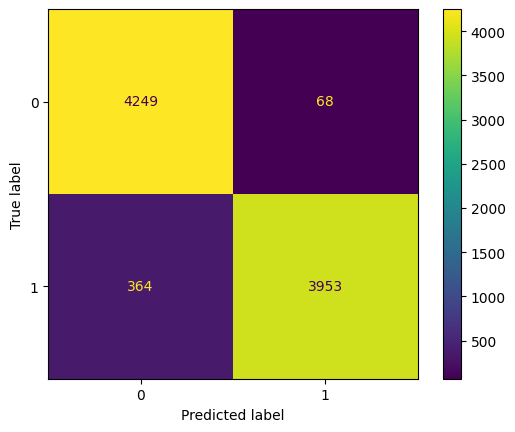

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred1))

ROC Curve

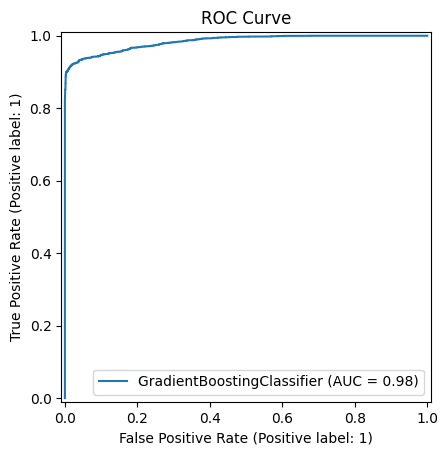

In [ ]:
RocCurveDisplay.from_estimator(gb1, X_test_os, y_test_os)
plt.title('ROC Curve')
plt.show()


In [ ]:
import pickle
pickle.dump(gb1,open('gb_model.sav','wb'))
pickle.dump(scaler,open('scaler.sav','wb'))

Parameter tuning for XGboost Classifier

In [ ]:
# param_grid = {
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0]
# }

In [ ]:
# grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search.fit(X_train_os, y_train_os)

In [ ]:
# print("Best parameters found: ", grid_search.best_params_)
# print("Best accuracy found: ", grid_search.best_score_)

{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 1.0}

In [ ]:
xgb1 = XGBClassifier(
    colsample_bytree=1.0,
    gamma=0,
    learning_rate=0.1,
    max_depth=9,
    n_estimators=300,
    subsample=1.0
)
xgb1.fit(X_train_os,y_train_os)
y_pred2=xgb1.predict(X_test_os)
print(classification_report(y_test_os,y_pred2))
print(f'Training Accuracy: {round(xgb1.score(X_train_os, y_train_os) * 100, 2)}%')
print(f'Test Accuracy: {round(xgb1.score(X_test_os, y_test_os) * 100, 2)}%')

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4317
           1       0.97      0.91      0.94      4317

    accuracy                           0.94      8634
   macro avg       0.94      0.94      0.94      8634
weighted avg       0.94      0.94      0.94      8634

Training Accuracy: 97.96%
Test Accuracy: 94.01%


After parameter tuning XGB model have 94% accuracy . So it is better not to consider this tuned model since with default parameters we gets an accuracy of 95%

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_os,y_train_os)
y_pred3=xgb.predict(X_test_os)
print(classification_report(y_test_os,y_pred3))
print(f'Training Accuracy: {round(xgb.score(X_train_os, y_train_os) * 100, 2)}%')
print(f'Test Accuracy: {round(xgb.score(X_test_os, y_test_os) * 100, 2)}%')

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4317
           1       0.98      0.91      0.94      4317

    accuracy                           0.95      8634
   macro avg       0.95      0.95      0.95      8634
weighted avg       0.95      0.95      0.95      8634

Training Accuracy: 97.04%
Test Accuracy: 94.58%


Confusion Matrix of XGBClassifier

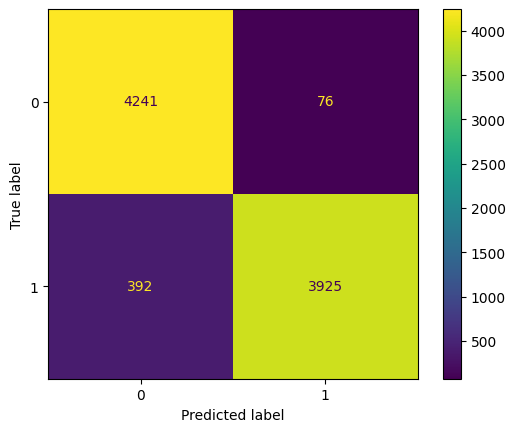

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred3))

ROC

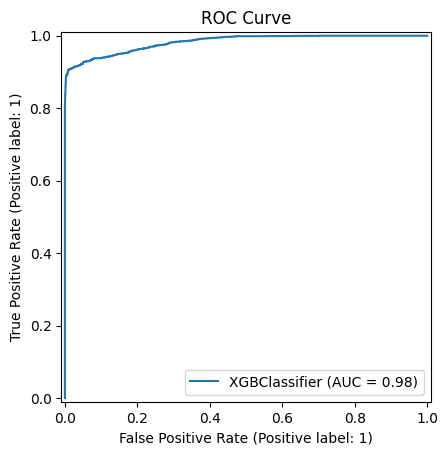

In [ ]:
RocCurveDisplay.from_estimator(xgb, X_test_os, y_test_os)
plt.title('ROC Curve')
plt.show()

We can conclude that the parameter tunned Gradient boosing classifier and XGBclassifier with its default parameters are the best models with an accuracy of 95%.